### Thompson sampling - (probabilistic method)

- Fit bernouilli distrubtions --> and take the one with the largest mean.
 The sampling is important --> pulls a value out of each fitted bernouilli --> take the "machine" with largest one.
 --> test the result for this machine --> recalulate the bernouilli fit.

https://www.udemy.com/machinelearning/learn/v4/t/lecture/6456840?start=0



Difference between UCB & Thompson sampling
Both have a whole family of algorithms.

UCB: deterministic
    --> requires update at each round
    
Thompson: probabilistic
    --> can accomadate delayed feedback (e.g. ads on the web): can update the bernouilli fits in batch.

In general: Thompson > UCB

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


2385
[4, 4, 4, 4, 7, 4, 7, 4, 4]


<IPython.core.display.Javascript object>


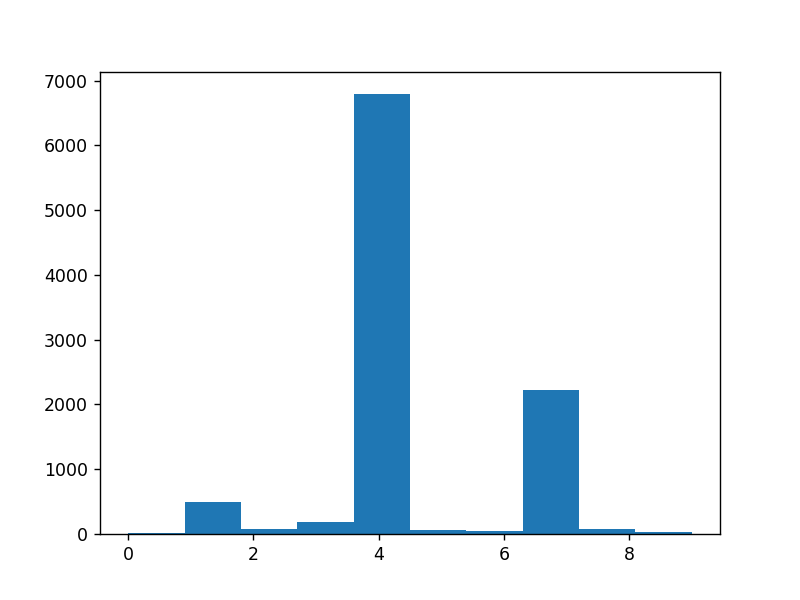

In [16]:
# Thompson Sampling

#Importing the libraries

#libraries
%matplotlib notebook   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# - Set path - 
#convert to raw string and add an extra \ to the end (not to escape the string)
dir = (r'C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\\Part 6 - Reinforcement Learning\Section 33 - Thompson Sampling\\')
os.chdir(dir)


# - - - - - - - - - - - -
# - import the dataset - 
# - - - - - - - - - - - -

dataset = pd.read_csv('Ads_CTR_Optimisation.csv') #CTR = click-through rate
display(dataset.head())

#implement strategy
# Need: 
#    - number of times the ad I got reward 1
#    - number of times the ad I got reward 0



import math
import random
N = 10000;
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0;

for n in range(0,N): #specific round
    ad = 0
    max_random = 0;
    for i in range(0,d): #specific ad
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
             
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    #number_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 0
            
    total_reward += reward #total reward of our process.

print(total_reward)
print(ads_selected[-9:])

%matplotlib notebook   
plt.hist(ads_selected)
plt.show()

<IPython.core.display.Javascript object>


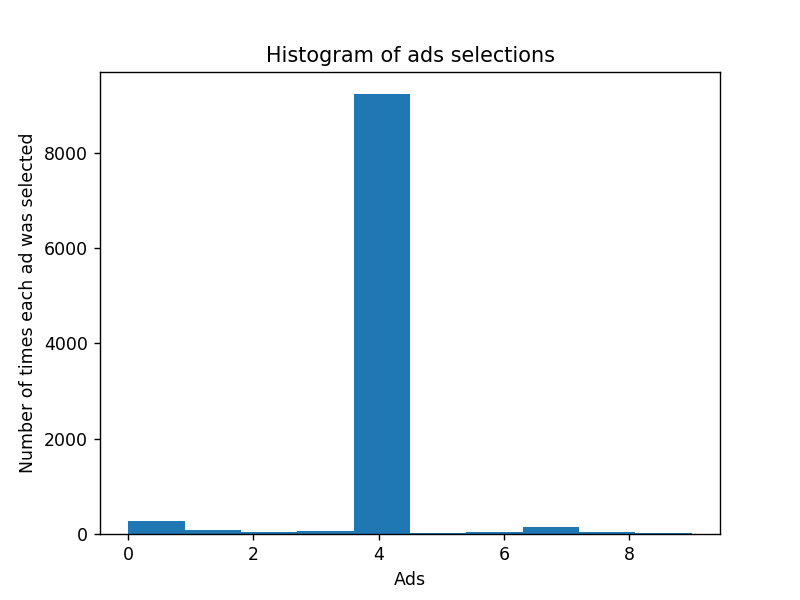